In [40]:
# Import numerical resources
import numpy as np
import random as rn

# Import graphics resources
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

In [41]:
x = np.linspace(0,1.0,9); print x
dx = x[1]-x[0]; print dx

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
0.125


In [42]:
D = 1.0

In [43]:
dt = dx**2/2/D /3; print dt
nt = 101 # Number of time steps
t = dt*nt; print t

0.00260416666667
0.263020833333


In [44]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.166666666667


In [45]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.49206714  0.80687543  0.29976438  0.1228962   0.76483695  0.16519356
   0.44451393  0.72226542  0.58079984]
 [ 0.43227675  0.86415706  0.4977411   0.90022997  0.96344513  0.32681688
   0.96144509  0.82478997  0.59342106]
 [ 0.97735831  0.39465329  0.3114265   0.04454406  0.56009774  0.46191651
   0.66605688  0.41337008  0.09423219]
 [ 0.7722833   0.65524707  0.35051266  0.93826714  0.0578741   0.05887625
   0.96516243  0.90742725  0.20564045]
 [ 0.38958957  0.32196191  0.42601942  0.64124617  0.88415677  0.53138512
   0.65914753  0.67251209  0.32008285]
 [ 0.24832294  0.32235446  0.14277598  0.97802027  0.4759747   0.30558789
   0.04852732  0.45564031  0.50895439]
 [ 0.49005197  0.20053038  0.80899199  0.76637806  0.3713666   0.95488142
   0.65771867  0.99572277  0.57113081]
 [ 0.87135326  0.22924579  0.37293406  0.90391953  0.97536825  0.39716976
   0.52033717  0.79423035  0.12202174]
 [ 0.1736612   0.359095    0.95324237  0.69049163  0.86466143  0.04153988
   0.86496805  0.66800

In [46]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [47]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.166666666667
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00260416666667
dx          float64          0.125
f           ndarray          102x9: 918 elems, type `float64`, 7344 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              101
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              101
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x11b8459b0>
rn          module           <module 'random' from '//<...>ib/python2.7/random.pyc'>
t           float64          0.263020833333
t_tot       list             n=102
tgrid       ndarray 

<IPython.core.display.Javascript object>


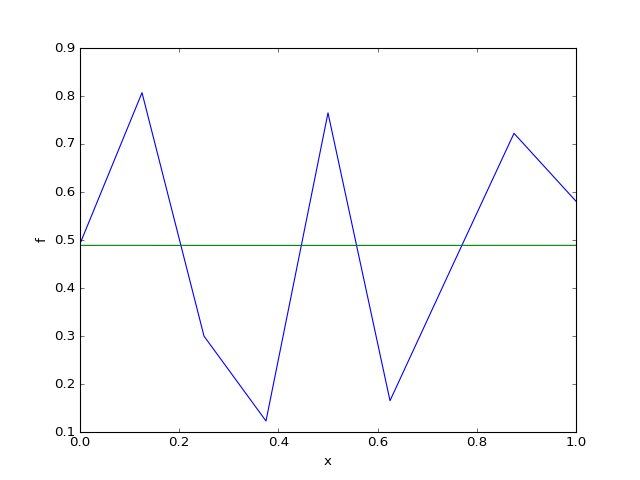

In [48]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])
plt.xlabel('x')
plt.ylabel('f')

<IPython.core.display.Javascript object>


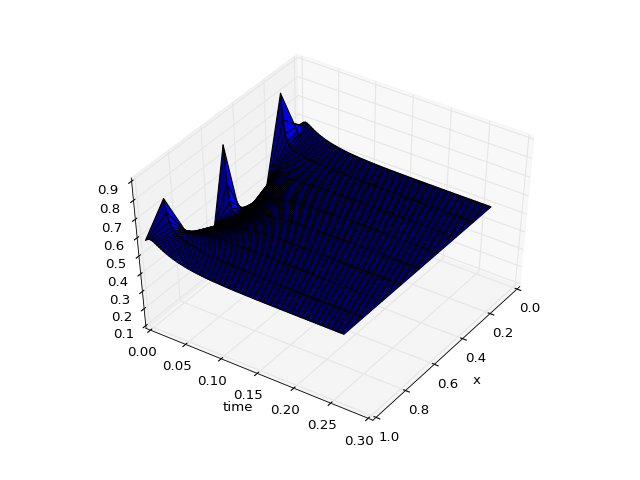

In [49]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')